###  Regresión y regresión

# Plan
* Pasar y extensión py
* Abrir en spider
* Acumular resultados
* Cargar en power bi
* Dormir

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
conGraficos=True

# Funciones

In [4]:
def hm_corr_graf(corr_matrix_V2, cat):
    aux=pd.pivot_table(corr_matrix_V2,columns=['variable_2'],index=['variable_1'],values=['r'])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    sns.heatmap(
        aux,
        annot     = True,
        cbar      = False,
        annot_kws = {"size": 10},
        vmin      = -0.5,
        vmax      = 0.5,
        center    = 0,
        cmap      = sns.diverging_palette(20, 220, n=200),
        square    = True,
        ax        = ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )
    ax.tick_params(labelsize = 10)
    ax.set_title(cat)

In [5]:
# para ver el grado de correlación entre las variables disponibles.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [6]:
def dic_corr_ind(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    #res_corr_total_var_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_razones)]
    res_corr_total_raz_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_causas2)]
    #res_corr_total_var_nacional.drop(columns=['abs_r'],inplace=True)
    res_corr_total_raz_nacional.drop(columns=['abs_r'],inplace=True)
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    
    res_corr_total_raz_nacional=res_corr_total_raz_nacional.sort_values('variable_1')
    
    #return res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones
    return res_corr_total_raz_nacional

In [7]:
def dic_corr_mes_ind(data):
    #res_corr_total_var=res_corr_total_var_nacional
    res_corr_total_raz=res_corr_total_raz_nacional
    dic_resultados={}
    
    for i in range(1,12):
        print(i)
        dic_aux={}
        data_aux=data[data['FECHA']==i]    
        corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
        corr_tab=tidy_corr_matrix(corr_matrix)
        corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
        #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]    
        dic_aux['total']=corr_tab_bajas    
        #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
        #dic_aux['razones']=corr_tab_razones
        dic_resultados[i]=dic_aux

    for i in range(1,12):
        print(i)
        #aux_tab_var=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_razones)]
        aux_tab_sel=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_causas2)]
        #aux_tab_var.drop(columns=['abs_r'],inplace=True)
        aux_tab_sel.drop(columns=['abs_r'],inplace=True)
        #aux_tab_var.columns=['variable_1',str(i)+'_r']
        ###aux_tab_sel.columns=['variable_1',str(i)+'_r']    
        aux_tab_sel.columns=['variable_1',i]
        #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
        res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')
    
    res_corr_total_raz_T=res_corr_total_raz.T
    res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
    res_corr_total_raz_T = res_corr_total_raz_T.iloc[2:]   
    
    #res_corr_total_var_T=res_corr_total_var.T
    #res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
    #res_corr_total_var_T = res_corr_total_var_T.iloc[1:]
    
    #return res_corr_total_raz_T, res_corr_total_var_T
    return res_corr_total_raz_T

In [8]:
def iter_regresion_VIF(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            if fila_problema['VIF'].values[0]>20 :
                variables_eliminar=fila_problema['Features']
            else:
                flag=0 
                
    return df_revision

In [9]:
def iter_regresion(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            flag=0
            #fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            #if fila_problema['VIF'].values[0]>20 :
            #    variables_eliminar=fila_problema['Features']
            #else:                 
                
    return df_revision

In [10]:
def dic_reg_mes_ind(data_reg):
    df_coef=df_coef_nal
    df_vif=df_vif_nal
    dic_resultados={}
    
    for i in range(1,12):
        dic_aux={}
        data_aux=data_reg[data_reg['FECHA']==i] 
        data_aux.drop(columns=['FECHA'],inplace=True)
        #data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
        
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]    
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados[i]=dic_aux
    
    for i in range(1,12):
        print(i)

        aux_tab_coef=dic_resultados[i]['coef']
        aux_tab_vif=dic_resultados[i]['vif']

        #aux_tab_coef.columns=[str(i)+'_coef']
        aux_tab_coef.columns=[i]
        #aux_tab_vif.columns=['Features',str(i)+'_vif']
        aux_tab_vif.columns=['Features',i]

        df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
        df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

    return df_coef, df_vif

# Carga Preprocesamiento

In [11]:
data_c0= pd.read_csv('NODOS_FILTRADOS_todos_ajuste_llamadas.csv',sep=';', header = 0)

In [12]:
data_c0.describe()

,MES,CANT_USER,BAJAS_1.TOTAL,BAJAS_2.CHURN_TEMPRANO,BAJAS_3.CHURN_7_24,BAJAS_4.VOL,BAJAS_5.INVOL,BAJAS_6.VOL_CHURN_TEMPRANO,BAJAS_7.INVOL_CHURN_TEMPRANO,BAJAS_8.VOL_CHURN_7_24,...,BAJAS_36.@_INVOL_CHURN_7_24,ALFA,ALFA_tarifa,BETA,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
count,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,...,40920.000000,40854.000000,40460.000000,40900.000000,40920.000000,40920.000000,40920.000000,40873.000000,40905.000000,40920.000000
mean,6.000000,275.469599,0.081841,0.014648,0.026227,0.042387,0.039454,0.002448,0.012201,0.010788,...,0.005869,1.327170,0.959862,1.300539,2.084167,1.413268,0.607031,1.027683,0.492774,0.361464
std,3.162316,132.125541,0.046878,0.019649,0.025442,0.028768,0.038787,0.005711,0.018080,0.013734,...,0.007343,0.952965,0.189934,0.577798,0.522468,0.349927,0.233454,0.591396,0.146034,0.095480
min,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.415299,0.139640,0.810591,0.507692,0.085366,0.000000,0.000000,0.118538
25%,3.000000,179.000000,0.049451,0.000000,0.007692,0.023649,0.011050,0.000000,0.000000,0.000000,...,0.000000,0.621516,0.819878,0.916020,1.710430,1.161826,0.444721,0.574017,0.385401,0.292254
50%,6.000000,258.000000,0.073810,0.008621,0.020595,0.037736,0.029580,0.000000,0.004717,0.006780,...,0.003817,1.129837,0.945336,1.185031,2.020168,1.377182,0.559140,0.952348,0.490298,0.347161
75%,9.000000,348.000000,0.105820,0.021978,0.037916,0.055266,0.057143,0.000000,0.018519,0.017422,...,0.008889,1.803862,1.081372,1.539098,2.390311,1.625000,0.716814,1.399959,0.598192,0.414185
max,11.000000,1366.000000,0.714286,0.363636,0.305085,0.670996,0.433447,0.088235,0.363636,0.144231,...,0.101695,6.372842,1.514445,4.666667,4.284211,2.701754,1.700787,3.175737,0.879946,0.688474


In [13]:
data_c0.columns

Index(['MES', 'NODO', 'DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO',
       'CANT_USER', 'BAJAS_1.TOTAL', 'BAJAS_2.CHURN_TEMPRANO',
       'BAJAS_3.CHURN_7_24', 'BAJAS_4.VOL', 'BAJAS_5.INVOL',
       'BAJAS_6.VOL_CHURN_TEMPRANO', 'BAJAS_7.INVOL_CHURN_TEMPRANO',
       'BAJAS_8.VOL_CHURN_7_24', 'BAJAS_9.INVOL_CHURN_7_24', 'BAJAS_10.V',
       'BAJAS_11.V_CHURN_TEMPRANO', 'BAJAS_12.V_CHURN_7_24', 'BAJAS_13.V_VOL',
       'BAJAS_14.V_INVOL', 'BAJAS_15.V_VOL_CHURN_TEMPRANO',
       'BAJAS_16.V_INVOL_CHURN_TEMPRANO', 'BAJAS_17.V_VOL_CHURN_7_24',
       'BAJAS_18.V_INVOL_CHURN_7_24', 'BAJAS_19.T',
       'BAJAS_20.T_CHURN_TEMPRANO', 'BAJAS_21.T_CHURN_7_24', 'BAJAS_22.T_VOL',
       'BAJAS_23.T_INVOL', 'BAJAS_24.T_VOL_CHURN_TEMPRANO',
       'BAJAS_25.T_INVOL_CHURN_TEMPRANO', 'BAJAS_26.T_VOL_CHURN_7_24',
       'BAJAS_27.T_INVOL_CHURN_7_24', 'BAJAS_28.@',
       'BAJAS_29.@_CHURN_TEMPRANO', 'BAJAS_30.@_CHURN_7_24', 'BAJAS_31.@_VOL',
       'BAJAS_32.@_INVOL', 'BAJAS_33.@_VOL_CHURN_TEMPRANO

In [14]:
sel_variables_descrip=['MES','NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO','CANT_USER']
sel_variables_causas2=['ALFA_tarifa','ALFA', 'BETA', 'MEGA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M','PENETRACION','OCUPACION_DW']
columns_bajas=list(data_c0.filter(regex=("BAJAS.*")).columns)

### Reemplazar nombre de columnas por compatibilidad

In [15]:
data_c0.rename(columns={'MES':'FECHA','NODO':'COD_NODO'}, inplace=True)

In [16]:
maestro_data=data_c0[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].drop_duplicates()

## CORRELACIONES

###  Correlacion Bajas Totales

##  Funcion validar configuraciones Nacional

In [17]:
list(data_c0.columns)

['FECHA',
 'COD_NODO',
 'DIVISION',
 'AREA',
 'ZONA',
 'CIUDAD',
 'DISTRITO',
 'CANT_USER',
 'BAJAS_1.TOTAL',
 'BAJAS_2.CHURN_TEMPRANO',
 'BAJAS_3.CHURN_7_24',
 'BAJAS_4.VOL',
 'BAJAS_5.INVOL',
 'BAJAS_6.VOL_CHURN_TEMPRANO',
 'BAJAS_7.INVOL_CHURN_TEMPRANO',
 'BAJAS_8.VOL_CHURN_7_24',
 'BAJAS_9.INVOL_CHURN_7_24',
 'BAJAS_10.V',
 'BAJAS_11.V_CHURN_TEMPRANO',
 'BAJAS_12.V_CHURN_7_24',
 'BAJAS_13.V_VOL',
 'BAJAS_14.V_INVOL',
 'BAJAS_15.V_VOL_CHURN_TEMPRANO',
 'BAJAS_16.V_INVOL_CHURN_TEMPRANO',
 'BAJAS_17.V_VOL_CHURN_7_24',
 'BAJAS_18.V_INVOL_CHURN_7_24',
 'BAJAS_19.T',
 'BAJAS_20.T_CHURN_TEMPRANO',
 'BAJAS_21.T_CHURN_7_24',
 'BAJAS_22.T_VOL',
 'BAJAS_23.T_INVOL',
 'BAJAS_24.T_VOL_CHURN_TEMPRANO',
 'BAJAS_25.T_INVOL_CHURN_TEMPRANO',
 'BAJAS_26.T_VOL_CHURN_7_24',
 'BAJAS_27.T_INVOL_CHURN_7_24',
 'BAJAS_28.@',
 'BAJAS_29.@_CHURN_TEMPRANO',
 'BAJAS_30.@_CHURN_7_24',
 'BAJAS_31.@_VOL',
 'BAJAS_32.@_INVOL',
 'BAJAS_33.@_VOL_CHURN_TEMPRANO',
 'BAJAS_34.@_INVOL_CHURN_TEMPRANO',
 'BAJAS_35.@_VOL_CH

In [18]:
#data_c0['BAJAS_1.TOTAL'].sum()
data_c0['BAJAS_31.@_VOL'].sum()


654.8626827798103

In [19]:
data_c0['ind_churn']=data_c0['BAJAS_31.@_VOL']

In [20]:
data_c0['COD_NODO'].value_counts().min()

11

In [21]:
#Eliminar validación ==1
data_c0['val_ind']=np.where(data_c0['ind_churn']==0,1,0)

In [22]:
data_c0.groupby('COD_NODO')[['val_ind']].max().describe()

,val_ind
count,3720.000000
mean,0.337903
std,0.473059
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [23]:
data_c0['COD_NODO'].nunique()

3720

In [24]:
res_nodo=data_c0.groupby('COD_NODO')[['val_ind']].max()

In [25]:
res_nodo['val_ind'].value_counts()

0    2463
1    1257
Name: val_ind, dtype: int64

In [26]:
# TODA LA DATA
#data_c0=data_c0[data_c0['COD_NODO'].isin(res_nodo[res_nodo['val_ind']==0].index)]

In [27]:
data_c0['COD_NODO'].nunique()

3720

# Val Configuraciones

In [28]:
DataSetEntregable_totales=pd.DataFrame()

In [29]:
DataSetEntregable_totales_temp=pd.DataFrame()

In [30]:
res_corr_total_raz_nacional=dic_corr_ind(data_c0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
res_corr_total_raz_nacional.rename(columns={'r':'NACIONAL'},inplace=True)

In [32]:
RV_nal_c0=dic_corr_ind(data_c0)

In [33]:
RV_nal_c0.rename(columns={'r':'NACIONAL'},inplace=True)

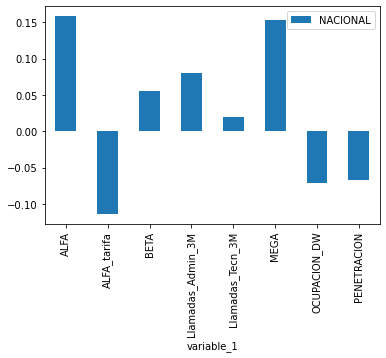

In [34]:
if conGraficos:
    RV_nal_c0.set_index('variable_1').plot.bar()

In [35]:
DataSetEntregable_totales=RV_nal_c0.copy()

In [36]:
DataSetEntregable_totales=DataSetEntregable_totales.set_index('variable_1').T

### Correlaciones x Periodo

### Funcion correlaciones por periodo
* Recibe los datos y retorna data framames para graficar

In [37]:
#(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_c0)
res_corr_total_raz_T=dic_corr_mes_ind(data_c0)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
1,0.182939,-0.145147,0.027591,0.136119,0.084383,0.19193,-0.081185,-0.007017
2,0.198935,-0.161004,0.062106,0.146656,0.068285,0.199929,-0.0808,-0.026581
3,0.187576,-0.160858,0.082516,0.118053,0.07069,0.174106,-0.07751,-0.050876
4,0.131669,-0.106616,0.040856,0.110994,0.04302,0.129073,-0.081508,-0.081422
5,0.160131,-0.075173,0.042542,0.116737,0.031457,0.16443,-0.063532,-0.095737
6,0.180503,-0.134623,0.056274,0.133368,0.058379,0.179015,-0.085021,-0.089076
7,0.154588,-0.122837,0.028676,0.11573,0.046976,0.167351,-0.077724,-0.080238
8,0.152602,-0.088415,0.022332,0.130113,0.034518,0.172552,-0.03992,-0.060429
9,0.167187,-0.102939,0.036215,0.120999,0.038838,0.173556,-0.099703,-0.061183
10,0.122528,-0.025318,-0.009462,0.183425,0.053334,0.148853,-0.058528,-0.057171


In [39]:
DataSetEntregable_totales_temp=res_corr_total_raz_T.copy()

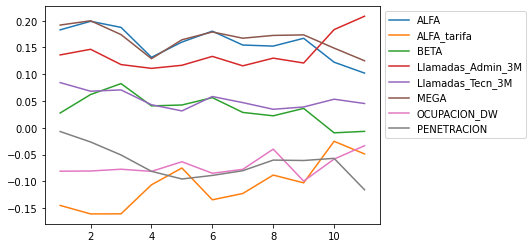

In [40]:
if conGraficos:
    ax = res_corr_total_raz_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

### Analisis Específicos

In [41]:
#data=data_c0.merge(maestro_data, left_on=['COD_NODO'], right_on=['COD_NODO'], how='left')
data=data_c0.copy()

In [42]:
data.groupby('DIVISION')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False)

,CANT_USER
DIVISION,
REGION CENTRO,5511084
REGION OCCIDENTE,2378040
REGION NOROCCIDENTE,1985062
REGION ORIENTE,969847
REGION COSTA,428183


In [43]:
data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6)

,CANT_USER
CIUDAD,
BOGOTA,5387124
CALI,1443961
MEDELLIN,1124616
PEREIRA,372451
BUCARAMANGA,338126
IBAGUE,305185


In [44]:
data[data['CIUDAD']=='BOGOTA'].groupby('AREA')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(10)

,CANT_USER
AREA,
BOGOTA NORTE,1478786
BOGOTA ORIENTE,1427870
BOGOTA SUR,1240343
BOGOTA OCCIDENTE,1240125


### Analisis regionales

In [45]:
regionales=data['DIVISION'].unique()
regionales = [x for x in regionales if pd.notnull(x)]
regionales

['REGION COSTA',
 'REGION ORIENTE',
 'REGION CENTRO',
 'REGION NOROCCIDENTE',
 'REGION OCCIDENTE']

In [46]:
dic_resultados={}

In [47]:
for reg in regionales:
    print(reg)
    dic_aux={}
    data_aux=data[data['DIVISION']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados[reg]=dic_aux

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [48]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in regionales:
    print(reg)
    #aux_tab_var=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg]
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
res_corr_total_raz_nacional

,variable_1,NACIONAL
1909,ALFA,0.158021
1958,ALFA_tarifa,-0.113852
2007,BETA,0.054865
2105,Llamadas_Admin_3M,0.079654
2154,Llamadas_Tecn_3M,0.019326
2203,MEGA,0.153120
2252,OCUPACION_DW,-0.071202
2301,PENETRACION,-0.066963


In [50]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [51]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
REGION COSTA,0.139332,-0.131364,0.064993,0.052672,0.040436,0.128191,-0.103941,-0.073132
REGION ORIENTE,0.139316,-0.056828,0.043238,0.186162,0.050221,0.134188,-0.043577,-0.116232
REGION CENTRO,0.145064,-0.17702,0.063073,0.033306,0.010921,0.12934,-0.079718,-0.06867
REGION NOROCCIDENTE,0.091993,-0.065213,0.027967,0.064751,0.022973,0.0915,-0.042292,-0.042657
REGION OCCIDENTE,0.20862,-0.039733,0.062443,0.142094,0.022746,0.210353,-0.067688,-0.11931


In [52]:
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
REGION COSTA,0.139332,-0.131364,0.064993,0.052672,0.040436,0.128191,-0.103941,-0.073132
REGION ORIENTE,0.139316,-0.056828,0.043238,0.186162,0.050221,0.134188,-0.043577,-0.116232
REGION CENTRO,0.145064,-0.17702,0.063073,0.033306,0.010921,0.12934,-0.079718,-0.06867
REGION NOROCCIDENTE,0.091993,-0.065213,0.027967,0.064751,0.022973,0.0915,-0.042292,-0.042657
REGION OCCIDENTE,0.20862,-0.039733,0.062443,0.142094,0.022746,0.210353,-0.067688,-0.11931


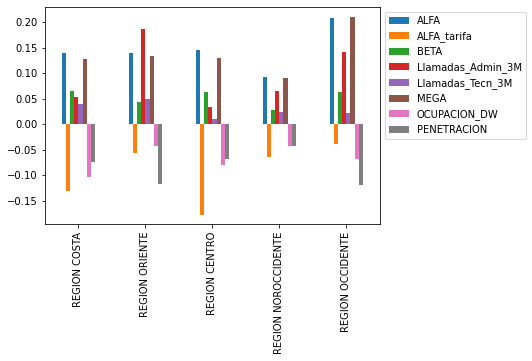

In [53]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(30,20));

### Analisis Temporal_ ESPECIFICO

In [54]:
## guardar en tabla
for reg in regionales:
    data_aux=data[data['DIVISION']==reg]    
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
DataSetEntregable_totales_temp['CATEGORIA']=DataSetEntregable_totales_temp['CATEGORIA'].fillna('NACIONAL')

In [56]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.182939,-0.145147,0.027591,0.136119,0.084383,0.19193,-0.081185,-0.007017,NACIONAL
2,0.198935,-0.161004,0.062106,0.146656,0.068285,0.199929,-0.0808,-0.026581,NACIONAL
3,0.187576,-0.160858,0.082516,0.118053,0.07069,0.174106,-0.07751,-0.050876,NACIONAL
4,0.131669,-0.106616,0.040856,0.110994,0.04302,0.129073,-0.081508,-0.081422,NACIONAL
5,0.160131,-0.075173,0.042542,0.116737,0.031457,0.16443,-0.063532,-0.095737,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.166589,0.039153,0.010628,0.183343,0.047042,0.179422,-0.104516,-0.179846,REGION OCCIDENTE
8,0.281002,-0.085248,0.085343,0.214345,0.142543,0.298417,-0.073054,-0.109443,REGION OCCIDENTE
9,0.159732,-0.066095,0.033986,0.142633,0.025666,0.179014,-0.079308,-0.096567,REGION OCCIDENTE
10,0.162365,-0.032592,-0.019686,0.191985,0.021456,0.18535,-0.069714,-0.166407,REGION OCCIDENTE


## Ciudades

In [57]:
ciudades=data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6).index
ciudades

Index(['BOGOTA', 'CALI', 'MEDELLIN', 'PEREIRA', 'BUCARAMANGA', 'IBAGUE'], dtype='object', name='CIUDAD')

In [58]:
dic_resultados_ciudad={}

In [59]:
for reg in ciudades:
    print(reg)
    dic_aux={}
    data_aux=data[data['CIUDAD']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_ciudad[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


In [60]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in ciudades:
    print(reg)
    #aux_tab_var=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [62]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
BOGOTA,0.144126,-0.17673,0.06256,0.029262,0.009631,0.128845,-0.078626,-0.065132
CALI,0.237801,-0.082376,0.048152,0.101486,-0.019316,0.249298,-0.087979,-0.08512
MEDELLIN,0.12463,-0.075834,0.057815,0.085617,0.083276,0.108622,-0.094627,-0.131381
PEREIRA,0.008878,0.122289,-0.056281,0.05565,-0.08997,0.05799,0.092798,0.089645
BUCARAMANGA,0.056396,0.049136,0.038007,0.121422,0.020145,0.043134,0.032871,-0.000442
IBAGUE,0.073705,0.105366,0.002094,0.155086,-0.008311,0.095292,0.077589,-0.044556


In [63]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
REGION COSTA,0.139332,-0.131364,0.064993,0.052672,0.040436,0.128191,-0.103941,-0.073132
REGION ORIENTE,0.139316,-0.056828,0.043238,0.186162,0.050221,0.134188,-0.043577,-0.116232
REGION CENTRO,0.145064,-0.17702,0.063073,0.033306,0.010921,0.12934,-0.079718,-0.06867
REGION NOROCCIDENTE,0.091993,-0.065213,0.027967,0.064751,0.022973,0.0915,-0.042292,-0.042657
REGION OCCIDENTE,0.20862,-0.039733,0.062443,0.142094,0.022746,0.210353,-0.067688,-0.11931
BOGOTA,0.144126,-0.17673,0.06256,0.029262,0.009631,0.128845,-0.078626,-0.065132
CALI,0.237801,-0.082376,0.048152,0.101486,-0.019316,0.249298,-0.087979,-0.08512
MEDELLIN,0.12463,-0.075834,0.057815,0.085617,0.083276,0.108622,-0.094627,-0.131381
PEREIRA,0.008878,0.122289,-0.056281,0.05565,-0.08997,0.05799,0.092798,0.089645


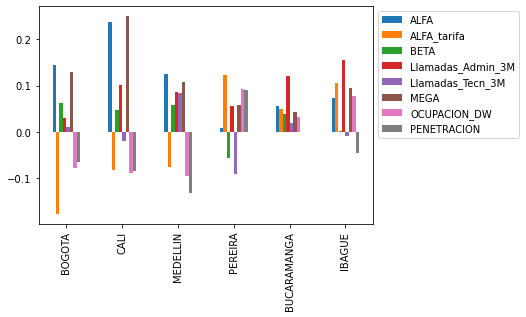

In [64]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

### Analisis temporal

In [65]:
## guardar en tabla
for reg in ciudades:
    data_aux=data[data['CIUDAD']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



1
2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.182939,-0.145147,0.027591,0.136119,0.084383,0.19193,-0.081185,-0.007017,NACIONAL
2,0.198935,-0.161004,0.062106,0.146656,0.068285,0.199929,-0.0808,-0.026581,NACIONAL
3,0.187576,-0.160858,0.082516,0.118053,0.07069,0.174106,-0.07751,-0.050876,NACIONAL
4,0.131669,-0.106616,0.040856,0.110994,0.04302,0.129073,-0.081508,-0.081422,NACIONAL
5,0.160131,-0.075173,0.042542,0.116737,0.031457,0.16443,-0.063532,-0.095737,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,-0.058559,0.218487,-0.224393,0.21324,0.010172,0.070819,0.026782,-0.119131,IBAGUE
8,0.165565,0.185303,0.073712,0.255256,0.131128,0.141086,0.088311,0.077497,IBAGUE
9,0.058126,0.089102,-0.10642,0.20208,0.013442,0.121521,0.239996,0.030627,IBAGUE
10,-0.052816,0.100021,-0.035678,0.305274,0.086672,-0.016394,-0.000089,-0.227319,IBAGUE


### Bogotá

In [67]:
sectoresBog=data[data['CIUDAD']=='BOGOTA']['AREA'].unique()

In [68]:
dic_resultados_Bogota={}

In [69]:
for reg in sectoresBog:
    print(reg)
    dic_aux={}
    data_aux=data[data['AREA']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_Bogota[reg]=dic_aux

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


In [70]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in sectoresBog:
    print(reg)
    #aux_tab_var=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


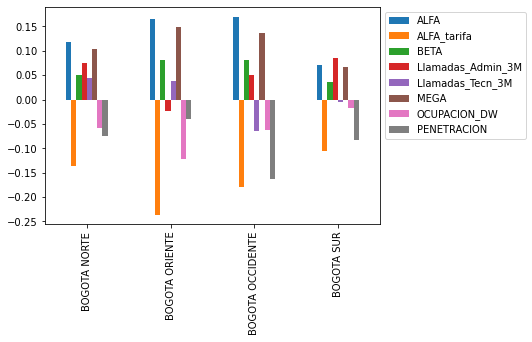

In [71]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]
if conGraficos:    
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

In [72]:
res_corr_total_raz_T[1:]

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
BOGOTA NORTE,0.118225,-0.137177,0.051301,0.07529,0.044476,0.103195,-0.058006,-0.074295
BOGOTA ORIENTE,0.165214,-0.235806,0.08087,-0.023522,0.037814,0.148716,-0.122389,-0.039901
BOGOTA OCCIDENTE,0.16961,-0.178975,0.081258,0.049599,-0.063527,0.136004,-0.062279,-0.162776
BOGOTA SUR,0.071771,-0.104629,0.035882,0.084814,-0.005246,0.065802,-0.017686,-0.08348


In [73]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
REGION COSTA,0.139332,-0.131364,0.064993,0.052672,0.040436,0.128191,-0.103941,-0.073132
REGION ORIENTE,0.139316,-0.056828,0.043238,0.186162,0.050221,0.134188,-0.043577,-0.116232
REGION CENTRO,0.145064,-0.17702,0.063073,0.033306,0.010921,0.12934,-0.079718,-0.06867
REGION NOROCCIDENTE,0.091993,-0.065213,0.027967,0.064751,0.022973,0.0915,-0.042292,-0.042657
REGION OCCIDENTE,0.20862,-0.039733,0.062443,0.142094,0.022746,0.210353,-0.067688,-0.11931
BOGOTA,0.144126,-0.17673,0.06256,0.029262,0.009631,0.128845,-0.078626,-0.065132
CALI,0.237801,-0.082376,0.048152,0.101486,-0.019316,0.249298,-0.087979,-0.08512
MEDELLIN,0.12463,-0.075834,0.057815,0.085617,0.083276,0.108622,-0.094627,-0.131381
PEREIRA,0.008878,0.122289,-0.056281,0.05565,-0.08997,0.05799,0.092798,0.089645


### Resultado Atemporal

In [74]:
### Guardar Archivo
##DataSetEntregable_totales.to_csv('CorrelacionesAgrupadas_14Dic.csv',sep=';')

### Temporales

In [75]:
## guardar en tabla
for reg in sectoresBog:
    data_aux=data[data['AREA']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Resulado Temporal

In [76]:
#DataSetEntregable_totales_temp.to_csv('CorrelacionesTemporales_14Dic.csv',sep=';')

# Regresión multilineal

* Reescalado
* Modelos

In [77]:
DataSetEntregable_totales_reg=pd.DataFrame()
DataSetEntregable_totales_temp_reg=pd.DataFrame()

In [78]:
data_reg=data_c0.copy()

In [79]:
data_reg=data_reg[data_reg['FECHA']>=4]

In [80]:
#sel_variables_causas2.remove('PENETRACION')
sel_variables_causas2

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

In [81]:
data_reg.set_index('COD_NODO',inplace=True)

In [82]:
data_reg=data_reg[sel_variables_causas2+['ind_churn','FECHA']]

In [83]:
data_reg.isnull().sum()/len(data_reg)

ALFA_tarifa          0.0
ALFA                 0.0
BETA                 0.0
MEGA                 0.0
Llamadas_Admin_3M    0.0
Llamadas_Tecn_3M     0.0
PENETRACION          0.0
OCUPACION_DW         0.0
ind_churn            0.0
FECHA                0.0
dtype: float64

In [84]:
data_reg=data_reg.dropna()

In [85]:
colums_reg=list(data_reg.columns)

In [86]:
colums_reg.remove('FECHA')

In [87]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW',
 'ind_churn']

In [88]:
#for col in colums_reg:
#    data_reg[col]=np.log1p(data_reg[col])

In [89]:
## Escalar
#cols=data_reg.columns
scaler = MinMaxScaler()
data_reg[colums_reg]= scaler.fit_transform(data_reg[colums_reg])

In [90]:
colums_reg.remove('ind_churn')

In [91]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

### Seleccion Variables Significativas

In [92]:
reg_nal=iter_regresion(data_reg)
reg_nal

1
      coefs        pvalues           Features    VIF
0 -0.021524   6.354730e-37        ALFA_tarifa   8.69
1  0.009328   6.065759e-02               ALFA  21.27
2  0.004244   2.673774e-01               BETA  13.64
3  0.027167   2.056668e-15               MEGA  17.76
4  0.048297  1.463880e-120  Llamadas_Admin_3M  10.61
5 -0.025439   1.215584e-29   Llamadas_Tecn_3M   8.36
6 -0.020338   6.716411e-39        PENETRACION   6.59
7 -0.020456   3.883906e-36       OCUPACION_DW  11.79
      coefs   pvalues Features    VIF
2  0.004244  0.267377     BETA  13.64
2
      coefs        pvalues           Features    VIF
0 -0.021574   4.140149e-37        ALFA_tarifa   7.67
1  0.014046   4.928251e-08               ALFA   6.44
2  0.024167   9.700586e-31               MEGA   8.78
3  0.048254  2.154570e-120  Llamadas_Admin_3M  10.57
4 -0.025444   1.187764e-29   Llamadas_Tecn_3M   8.19
5 -0.020390   4.014325e-39        PENETRACION   6.29
6 -0.020562   1.283706e-36       OCUPACION_DW  11.32
      coefs       p

,coefs,pvalues,Features,VIF
0,-0.021574,4.140149e-37,ALFA_tarifa,7.67
1,0.014046,4.928251e-08,ALFA,6.44
2,0.024167,9.700586e-31,MEGA,8.78
3,0.048254,2.154570e-120,Llamadas_Admin_3M,10.57
4,-0.025444,1.187764e-29,Llamadas_Tecn_3M,8.19
5,-0.020390,4.014325e-39,PENETRACION,6.29
6,-0.020562,1.283706e-36,OCUPACION_DW,11.32


In [93]:
colums_reg=list(reg_nal['Features'])
colums_reg

['ALFA_tarifa',
 'ALFA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

### Nacional

In [94]:
# Dividir en X y X
y_train = data_reg['ind_churn']
X_train =  data_reg[colums_reg]

In [95]:
#Modelos
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ind_churn   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     254.9
Date:                Tue, 11 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:39:00   Log-Likelihood:                 50574.
No. Observations:               29760   AIC:                        -1.011e+05
Df Residuals:                   29752   BIC:                        -1.011e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0798      0.002     48.298      0.000       0.077       0.083
ALFA_tarifa          -0.0216      0.002    -12.745      0.000      -0.025      -0.018
ALFA                  0.0140      0.003      5.455      0.000       0.009       0.019
MEGA                  0.0242      0.002     11.539      0.000       0.020       0.028
Llamadas_Admin_3M     0.0483      0.002     23.438      0.000       0.044       0.052
Llamadas_Tecn_3M     -0.0254      0.002    -11.321      0.000      -0.030      -0.021
PENETRACION          -0.0204      0.002    -13.104      0.000      -0.023      -0.017
OCUPACION_DW         -0.0206      0.002    -12.656      0.000      -0.024      -0.017
==============================================================================
Omnibus:                    15718.673   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380256.819
Skew:                           2.038   Prob(JB):                         0.00
Kurtosis:                      20.031   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,OCUPACION_DW,11.32
3,Llamadas_Admin_3M,10.57
2,MEGA,8.78
4,Llamadas_Tecn_3M,8.19
0,ALFA_tarifa,7.67
1,ALFA,6.44
5,PENETRACION,6.29


In [97]:
df_coef_nal=lr_1.params.to_frame()
df_coef_nal.columns=['coefs']

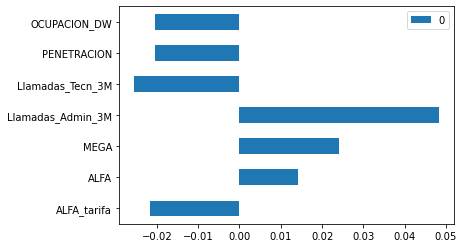

In [98]:
if conGraficos:
    lr_1.params.to_frame()[1:].plot.barh()

In [99]:
df_coef_nal

,coefs
const,0.079775
ALFA_tarifa,-0.021574
ALFA,0.014046
MEGA,0.024167
Llamadas_Admin_3M,0.048254
Llamadas_Tecn_3M,-0.025444
PENETRACION,-0.020390
OCUPACION_DW,-0.020562


In [100]:
df_vif_nal=vif

In [101]:
DataSetEntregable_totales_reg=df_coef_nal.copy()

In [102]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg[1:].T
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.021574,0.014046,0.024167,0.048254,-0.025444,-0.02039,-0.020562


In [103]:
DataSetEntregable_totales_reg['index']='NACIONAL'
DataSetEntregable_totales_reg.set_index('index',inplace=True)
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
index,,,,,,,
NACIONAL,-0.021574,0.014046,0.024167,0.048254,-0.025444,-0.02039,-0.020562


## Regresión en el tiempo

In [104]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
RO4,0.471589,0.270868,0.262215,0.409814,0.355105,0.388447,0.339042,0.699387,0.021177,7
KRI,0.607833,0.156601,0.298927,0.210554,0.300533,0.181737,0.280533,0.359557,0.045029,7
GIA,0.487542,0.037083,0.267557,0.055167,0.483996,0.241001,0.265495,0.397254,0.054149,7
CLD,0.473778,0.165939,0.204135,0.313230,0.380845,0.242209,0.657674,0.587460,0.055971,11
SH31,0.490136,0.228723,0.332667,0.278934,0.378560,0.142346,0.161941,0.517957,0.134885,9
...,...,...,...,...,...,...,...,...,...,...
CS21,0.266219,0.285820,0.167077,0.640440,0.320040,0.218219,0.514928,0.696087,0.078411,7
S04,0.502347,0.443881,0.323249,0.555722,0.393165,0.226038,0.393076,0.336555,0.087600,11
472D,0.455809,0.260804,0.149482,0.641460,0.368423,0.373531,0.707373,0.440992,0.065476,4


In [105]:
##(df_coef, df_vif)=dic_reg_mes_ind(data_reg)

In [106]:
##df_coef

In [107]:
##df_coef_T=df_coef.T
##df_coef_T.pop('const')
##df_coef_T=df_coef_T[1:]
##df_coef_T

In [108]:
##DataSetEntregable_totales_temp_reg=df_coef_T.copy()

In [109]:
##if conGraficos:
##    ax = df_coef_T.plot.line()
##    ax.legend(bbox_to_anchor=(1.0, 1.0))
##    ax.plot(figsize=(20,10));

## Analisis Específicos

In [110]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
RO4,0.471589,0.270868,0.262215,0.409814,0.355105,0.388447,0.339042,0.699387,0.021177,7
KRI,0.607833,0.156601,0.298927,0.210554,0.300533,0.181737,0.280533,0.359557,0.045029,7
GIA,0.487542,0.037083,0.267557,0.055167,0.483996,0.241001,0.265495,0.397254,0.054149,7
CLD,0.473778,0.165939,0.204135,0.313230,0.380845,0.242209,0.657674,0.587460,0.055971,11
SH31,0.490136,0.228723,0.332667,0.278934,0.378560,0.142346,0.161941,0.517957,0.134885,9
...,...,...,...,...,...,...,...,...,...,...
CS21,0.266219,0.285820,0.167077,0.640440,0.320040,0.218219,0.514928,0.696087,0.078411,7
S04,0.502347,0.443881,0.323249,0.555722,0.393165,0.226038,0.393076,0.336555,0.087600,11
472D,0.455809,0.260804,0.149482,0.641460,0.368423,0.373531,0.707373,0.440992,0.065476,4


In [111]:
data_reg_nor=data_reg.copy()

In [112]:
data_reg_nor=data_reg_nor.merge(maestro_data, left_index=True, right_on=['COD_NODO'], how='left')
data_reg_nor.set_index('COD_NODO', inplace=True)

In [113]:
data_reg_nor_temp=data_reg_nor.copy()

In [114]:
data_reg_nor.pop('FECHA')

COD_NODO
RO4      7
KRI      7
GIA      7
CLD     11
SH31     9
        ..
CS21     7
S04     11
472D     4
ACB     11
E3Z      5
Name: FECHA, Length: 30944, dtype: int64

## Regional

In [115]:
dic_resultados_reg={}

In [116]:
for reg in regionales:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    y_train = data_aux.pop('ind_churn')
    X_train = data_aux[colums_reg]    
    #Modelos
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()    
    dic_aux['coef']=lr_1.params.to_frame()
    dic_aux['coef'].columns=['coefs']
    # Cálculo VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    dic_aux['vif']=vif
    dic_resultados[reg]=dic_aux

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [117]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in regionales:
    print(reg)
    
    aux_tab_coef=dic_resultados[reg]['coef']
    aux_tab_vif=dic_resultados[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [118]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])

In [119]:
df_coef_T

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.021574,0.014046,0.024167,0.048254,-0.025444,-0.020390,-0.020562
REGION COSTA,-0.028771,0.006683,0.011103,0.037595,-0.009134,-0.009973,-0.034489
REGION ORIENTE,-0.018552,0.008403,0.015605,0.090954,-0.030180,-0.013961,-0.010063
REGION CENTRO,-0.049409,0.016865,0.010831,0.046994,-0.025240,-0.017809,-0.021070
REGION NOROCCIDENTE,-0.016351,0.023955,0.036171,0.048386,-0.008595,-0.001275,-0.021287
REGION OCCIDENTE,-0.000328,0.019764,0.042656,0.109750,-0.039952,-0.006398,-0.023687


In [120]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.021574,0.014046,0.024167,0.048254,-0.025444,-0.020390,-0.020562
REGION COSTA,-0.028771,0.006683,0.011103,0.037595,-0.009134,-0.009973,-0.034489
REGION ORIENTE,-0.018552,0.008403,0.015605,0.090954,-0.030180,-0.013961,-0.010063
REGION CENTRO,-0.049409,0.016865,0.010831,0.046994,-0.025240,-0.017809,-0.021070
REGION NOROCCIDENTE,-0.016351,0.023955,0.036171,0.048386,-0.008595,-0.001275,-0.021287
REGION OCCIDENTE,-0.000328,0.019764,0.042656,0.109750,-0.039952,-0.006398,-0.023687


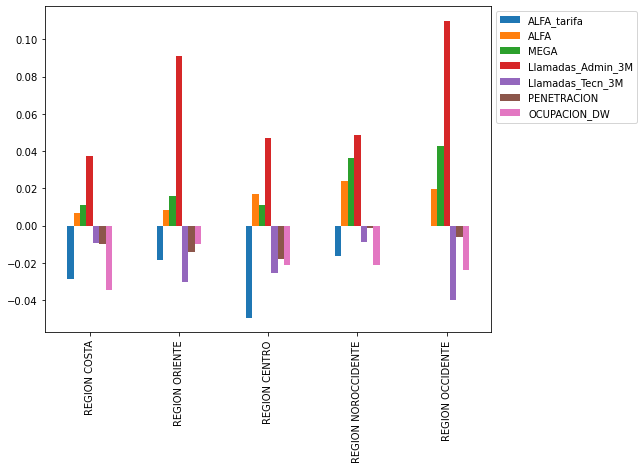

In [121]:
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

####  Analisis temporal

In [122]:
"""
for reg in regionales:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)    
"""

"\nfor reg in regionales:\n    data_aux=data_reg_nor_temp[data_reg_nor_temp['DIVISION']==reg] \n    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])\n    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)\n    df_coef_T=df_coef.T\n    df_coef_T.pop('const')\n    df_coef_T=df_coef_T[1:]\n    df_coef_T['CATEGORIA']=reg\n    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)    \n"

In [124]:
#DataSetEntregable_totales_temp_reg['CATEGORIA']=DataSetEntregable_totales_temp_reg['CATEGORIA'].fillna('NACIONAL')

In [125]:
DataSetEntregable_totales_temp_reg

""


## Ciudades

In [126]:
dic_resultados_ciudad_reg={}
for reg in ciudades:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['CIUDAD']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_ciudad_reg[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


In [127]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_ciudad_reg:
    print(reg)    
    aux_tab_coef=dic_resultados_ciudad_reg[reg]['coef']
    aux_tab_vif=dic_resultados_ciudad_reg[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


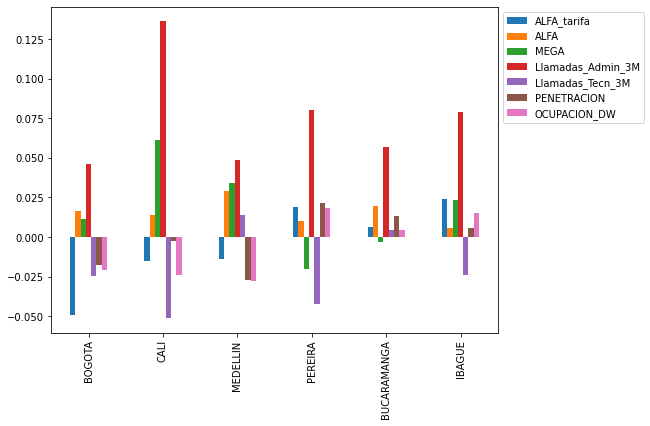

In [128]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [129]:
df_coef_T[1:]

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
BOGOTA,-0.049480,0.016352,0.011260,0.046338,-0.024956,-0.017511,-0.020825
CALI,-0.015026,0.013845,0.061375,0.136034,-0.051155,-0.002815,-0.023824
MEDELLIN,-0.014145,0.028698,0.034348,0.048631,0.013573,-0.027137,-0.027974
PEREIRA,0.018801,0.009812,-0.020176,0.080351,-0.042362,0.021554,0.018580
BUCARAMANGA,0.006093,0.019443,-0.002977,0.056935,0.004428,0.013012,0.004558
IBAGUE,0.024026,0.005732,0.023023,0.078902,-0.023870,0.005922,0.015094


In [130]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.021574,0.014046,0.024167,0.048254,-0.025444,-0.020390,-0.020562
REGION COSTA,-0.028771,0.006683,0.011103,0.037595,-0.009134,-0.009973,-0.034489
REGION ORIENTE,-0.018552,0.008403,0.015605,0.090954,-0.030180,-0.013961,-0.010063
REGION CENTRO,-0.049409,0.016865,0.010831,0.046994,-0.025240,-0.017809,-0.021070
REGION NOROCCIDENTE,-0.016351,0.023955,0.036171,0.048386,-0.008595,-0.001275,-0.021287
REGION OCCIDENTE,-0.000328,0.019764,0.042656,0.109750,-0.039952,-0.006398,-0.023687
BOGOTA,-0.049480,0.016352,0.011260,0.046338,-0.024956,-0.017511,-0.020825
CALI,-0.015026,0.013845,0.061375,0.136034,-0.051155,-0.002815,-0.023824
MEDELLIN,-0.014145,0.028698,0.034348,0.048631,0.013573,-0.027137,-0.027974
PEREIRA,0.018801,0.009812,-0.020176,0.080351,-0.042362,0.021554,0.018580


#### Analisis temporal

In [131]:
"""
for reg in ciudades:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['CIUDAD']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)
"""

"\nfor reg in ciudades:\n    data_aux=data_reg_nor_temp[data_reg_nor_temp['CIUDAD']==reg]\n    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])\n    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)\n    df_coef_T=df_coef.T\n    df_coef_T.pop('const')\n    df_coef_T=df_coef_T[1:]\n    df_coef_T['CATEGORIA']=reg\n    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)\n"

In [132]:
DataSetEntregable_totales_temp_reg

""


## Bogota

In [133]:
dic_resultados_Bogota={}
for reg in sectoresBog:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['AREA']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_Bogota[reg]=dic_aux

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


In [134]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_Bogota:
    print(reg)    
    aux_tab_coef=dic_resultados_Bogota[reg]['coef']
    aux_tab_vif=dic_resultados_Bogota[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


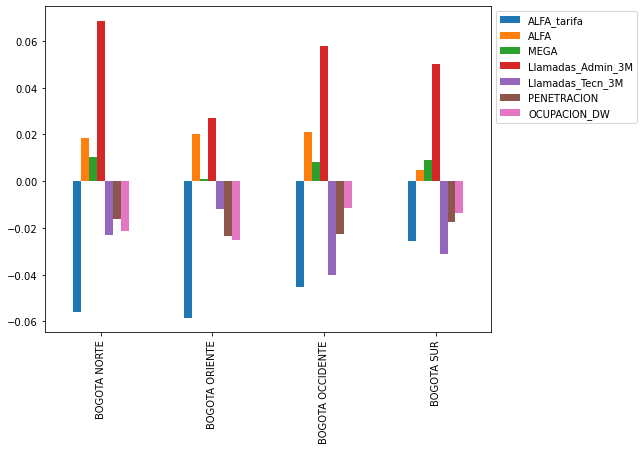

In [135]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [136]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.021574,0.014046,0.024167,0.048254,-0.025444,-0.020390,-0.020562
REGION COSTA,-0.028771,0.006683,0.011103,0.037595,-0.009134,-0.009973,-0.034489
REGION ORIENTE,-0.018552,0.008403,0.015605,0.090954,-0.030180,-0.013961,-0.010063
REGION CENTRO,-0.049409,0.016865,0.010831,0.046994,-0.025240,-0.017809,-0.021070
REGION NOROCCIDENTE,-0.016351,0.023955,0.036171,0.048386,-0.008595,-0.001275,-0.021287
REGION OCCIDENTE,-0.000328,0.019764,0.042656,0.109750,-0.039952,-0.006398,-0.023687
BOGOTA,-0.049480,0.016352,0.011260,0.046338,-0.024956,-0.017511,-0.020825
CALI,-0.015026,0.013845,0.061375,0.136034,-0.051155,-0.002815,-0.023824
MEDELLIN,-0.014145,0.028698,0.034348,0.048631,0.013573,-0.027137,-0.027974
PEREIRA,0.018801,0.009812,-0.020176,0.080351,-0.042362,0.021554,0.018580


### Analisis Temporal

In [137]:
"""
for reg in sectoresBog:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['AREA']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)
"""

"\nfor reg in sectoresBog:\n    data_aux=data_reg_nor_temp[data_reg_nor_temp['AREA']==reg]\n    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])\n    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)\n    df_coef_T=df_coef.T\n    df_coef_T.pop('const')\n    df_coef_T=df_coef_T[1:]\n    df_coef_T['CATEGORIA']=reg\n    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)\n"

In [138]:
DataSetEntregable_totales_temp_reg

""


In [139]:
### Guardar Archivo

In [140]:
#DataSetEntregable_totales_reg.to_csv('RegresionesAgrupadas_14Dic.csv',sep=';')

In [141]:
#DataSetEntregable_totales_temp_reg.to_csv('RegresionesTemporales_14Dic.csv',sep=';')

    ## Nodos 

In [151]:
#NodosBog=data[data['CIUDAD']=='BOGOTA']['COD_NODO'].unique()
NodosBog=data['COD_NODO'].unique()

In [152]:
len(NodosBog)

3720

In [153]:
data_reg_nor

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
COD_NODO,,,,,,,,,,,,,,
RO4,0.471589,0.270868,0.262215,0.409814,0.355105,0.388447,0.339042,0.699387,0.021177,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
KRI,0.607833,0.156601,0.298927,0.210554,0.300533,0.181737,0.280533,0.359557,0.045029,REGION ORIENTE,CUNMENAL,META,VILLAVICENCIO,VILLAVICENCIO NORTE
GIA,0.487542,0.037083,0.267557,0.055167,0.483996,0.241001,0.265495,0.397254,0.054149,REGION CENTRO,BOGOTA ORIENTE,USME,BOGOTA,LA VICTORIA
CLD,0.473778,0.165939,0.204135,0.313230,0.380845,0.242209,0.657674,0.587460,0.055971,REGION CENTRO,BOGOTA OCCIDENTE,PORVENIR,BOGOTA,PATIO BONITO
SH31,0.490136,0.228723,0.332667,0.278934,0.378560,0.142346,0.161941,0.517957,0.134885,REGION CENTRO,BOGOTA OCCIDENTE,ESTRADA,BOGOTA,VILLA LUZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS21,0.266219,0.285820,0.167077,0.640440,0.320040,0.218219,0.514928,0.696087,0.078411,REGION CENTRO,BOGOTA ORIENTE,RESTREPO,BOGOTA,LA FRAGUA
S04,0.502347,0.443881,0.323249,0.555722,0.393165,0.226038,0.393076,0.336555,0.087600,REGION CENTRO,BOGOTA NORTE,MAZUREN,BOGOTA,SUBA RINCON
472D,0.455809,0.260804,0.149482,0.641460,0.368423,0.373531,0.707373,0.440992,0.065476,REGION CENTRO,BOGOTA SUR,ALSACIA,BOGOTA,HAYUELOS


In [154]:
data_reg_nor[data_reg_nor.index=='RO4']

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
COD_NODO,,,,,,,,,,,,,,
RO4,0.471589,0.270868,0.262215,0.409814,0.355105,0.388447,0.339042,0.699387,0.021177,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.367180,0.320447,0.153642,0.770304,0.503064,0.406146,0.326049,0.973299,0.062602,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.171826,0.437028,0.230170,0.742364,0.191121,0.224553,0.361913,0.591231,0.060535,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.478908,0.506823,0.311682,0.655957,0.453869,0.404702,0.326049,0.912491,0.020666,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.377212,0.405718,0.236698,0.672362,0.186795,0.236233,0.372708,0.580330,0.020178,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.497981,0.506422,0.323507,0.633554,0.311694,0.325123,0.380734,0.681572,0.041132,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.477517,0.341011,0.270972,0.500937,0.476434,0.477756,0.330709,0.800278,0.042146,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.244056,0.461715,0.216437,0.827864,0.246153,0.235221,0.362736,0.564708,0.084708,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3


In [155]:
dic_resultados_NodosBogota={}
for reg in NodosBog:
    print(reg)
    dic_aux={}    
    #data_aux=data_reg_nor[data_reg_nor['COD_NODO']==reg] 
    data_aux=data_reg_nor[data_reg_nor.index==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_NodosBogota[reg]=dic_aux

RO4
KRI
5B6022
GIA
CLD
SH31
PIO4
5C7014
ST3
CN2
2GR
ZVD
MRB
G4V
CZP
PRZ
13A1
GO2
AF1
BIN
FGH
56B4D
MRT
SD3
COL
50B4D
8A4011
JSA
BER
TRN
MTO12D
FSE
TFZ
N2U
TOS
1TE
SF41
PBL
VPA
3VU
UL2
39F3D
NMR
VER23B
PQI
G3A
7UT
JD9
ASU3
LEO
1LG
QUT
CEE
MS2
MSI
AFU
GVO
C021
VF1
VV4
PVE
SLT
AL34
BG2
TB52D
AMB3D
VAL
BVI
EDC
57013M
I2S2D
CUF
JQO
ORA
BJ2
DAA
OTB
AB3
DRE
JA3
MTO14D
5AL014
5A2012
T5P
3CT
KH2
1EN
C49
TAY
GA2
TCH1
54F3D
AO3
2AB
52G
RON
12C
ALI
6MT
LOT
MTC
6DD
DVC2D
SCI
MU6
GA5
NIG
LAD13D
NNT
EF5
BY1
ANA
MHC
P1E
CT4
3802
4B4013
NVV
Z3C
9AA2D
JR2
SEM1
FA3
15B
GGR
C6Y
CMF1
40D3D
50B23D
48A
A9P
LAG
JS5
SRN
SK1
ODE
VLL
SFE
3AZ
NI4
3RG
CT3
P2E1
RDC4D
CAH
8C5011
F2I
MIL
CUI1
BNB
OIR
2C7021
KH21
4A8013
SEP
2RU
B1I4D
BNI
LTZ4D
LEV
VT2
6CO
BOT
PLD
35A4D
2B3032
4TE
9AA3
BSD
E4I
TC6
37B1
NN1
CU2
61014D
SEU
GA12
5001
JBR
5DB
VV9
JY2
PRN
4HB
A1F
JS3
CAE
3BT
7BZ
T5Y
RGF
G1S
4B0012
AF22
4SJ
RE5
8A22
5B0022
ILI
5AL012
MDR1
IAI
MON2
COS2
VN2
PTR
PBU
CZL
CZ2
5AM011
LM21
PRL
ROI
DVI11M
5AM023
2CT
SM5
OG1
TOZ
AL3

QG2
PMM
1VA
QUA
AND
FL1
5A1011
KM2
BR9
BPO
VJ52D
AIC
ST0
VJ12D
SEV
4B5013
CRC
MVX
AQN
RUE
DS3
PA1
RRM
SA1
1AB
F11
JSI
6GE
I3T
URA
AU4
DOR
4VV
4D3011
G3Y
YM1
ST12D
C4S
BLT1
C64
5CE014
S03
LRI
1BQ13D
SML3
CRP
RBP
LF9
53A1
EUR3D
FC2
41B14D
ARJ
GUI
C26
1SV4D
BC2
1B6012
1PP
ERV
MT6
3SF
R1G
ZAR4
ZT2
C294D
PRE
UY4
L1I
39H3D
5GR
ELO
C3F
BHT
FV23D
L2P
8C7012
74013D
8A4013
QDP
LSL
PPU
PRI12D
LPV
NOA
5VP
B2H13D
VY11
FT4
AVE
JPM
TLN
VRI1
GN21
DJ3
S4Y
N5R
41F
TDM
1LO
5B0023
A6U
T6T
SC34D
3SM1
AH21
TRT1
VHA
UCL
5A5034
JAZ4D
9A8
MY2
8A2
QV5
CRM
MEB
UB3
C74
NF5
4B1011
LF3
C1K2
5AE011
45B2
T4P
MP4
DR6
FDN
39H4D
C6S
SE24D
VG23
DAN
QRG
TVZ
UMA
PAN
NQ2
VE2
1SS
BAA
2CP
45A22B
DL21
RB2
SAV2D
BRR
PRS
PRI13D
VIC1
RPS
S21
VMY1
BNA
F2D
5B0012
SC33D
PAD
1AT
EJJ
2EN
ENC3
OTU
1AZ
L10
CFR2D
PHD
OVC
LFV
ROL
UGN
CAZ
MIN3
RG0
4LP
R1L
LSO
MAA
LU1
50C4D
UD4
LBT
6VF
MU1
4AF
53E
4B5011
BHU
BCH13D
1EN4D
SJ1
0DB
LH51
39C4D
FL12D
15A11
S1H
IMU
UL4
35C
C99
FRE
39D2D
TUP
PRS1
LTZ1
14A14D
TIA
50B24D
R1I
STZ
C2K
PV23D
VJ3
PST
GA

NGL
SA2
A5U4D
SJD
R3U
DTJ
A2U
OKC
52D4D
SND
AEQ
4B2014
FV2
AEE
GUN
9A1
4B2011
BMG
39A4D
1EM
MEO
PEP2D
TPV
ZT1
TZ12
VLL1
NR5
ATZ
67011
PIV3
BLS
3LP
CO3
AMB
5B2013
CD1
LRB
PV2
D12
VZY
OLS
RS1
9A84D
LP2
CG11
2SV
2B3024
4SP
OA2
I1O
MGT
BSR
4B7011
CAG
FRO3B
QV2
ORL
PDZ
O2L
MQ3
BZD
STS
BSC12D
PIM
C76
IFN
HED
LP1
2C7013
PN13B
FIR
RR3
LRL
ZH22
51A
MD22
QOS
B2H2
EXT1
FNS
EOI
C9O
PO2
RE3
NVE
SVC
ST32D
AS2
AAN
AZ3
52J
VDY
LRQ
NE1
8BZ
IR2
LF8
1RA1
TOM
AR4
U2E
LF4
G2V
44A1
LOM2
NEM3D
VG244D
BBC
NIE
LVI1
GO1
4RC
S034D
N2C
FC3
BZ1
1B6024
0CP
GUL4D
LFD
LSM4D
CTN
PJI
AFA
CC6
SDG
E1M
1301
ADO
NB1
9A3D
OTC
CD11
BZA1
RL2
9AA3D
LF32D
31A024
G2Y
CMZ
1BC023
LAS


In [156]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_NodosBogota:
    print(reg)    
    aux_tab_coef=dic_resultados_NodosBogota[reg]['coef']
    aux_tab_vif=dic_resultados_NodosBogota[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

RO4
KRI
5B6022
GIA
CLD
SH31
PIO4
5C7014
ST3
CN2
2GR
ZVD
MRB
G4V
CZP
PRZ
13A1
GO2
AF1
BIN
FGH
56B4D
MRT
SD3
COL
50B4D
8A4011
JSA
BER
TRN
MTO12D
FSE
TFZ
N2U
TOS
1TE
SF41
PBL
VPA
3VU
UL2
39F3D
NMR
VER23B
PQI
G3A
7UT
JD9
ASU3
LEO
1LG
QUT
CEE
MS2
MSI
AFU
GVO
C021
VF1
VV4
PVE
SLT
AL34
BG2
TB52D
AMB3D
VAL
BVI
EDC
57013M
I2S2D
CUF
JQO
ORA
BJ2
DAA
OTB
AB3
DRE
JA3
MTO14D
5AL014
5A2012
T5P
3CT
KH2
1EN
C49
TAY
GA2
TCH1
54F3D
AO3
2AB
52G
RON
12C
ALI
6MT
LOT
MTC
6DD
DVC2D
SCI
MU6
GA5
NIG
LAD13D
NNT
EF5
BY1
ANA
MHC
P1E
CT4
3802
4B4013
NVV
Z3C
9AA2D
JR2
SEM1
FA3
15B
GGR
C6Y
CMF1
40D3D
50B23D
48A
A9P
LAG
JS5
SRN
SK1
ODE
VLL
SFE
3AZ
NI4
3RG
CT3
P2E1
RDC4D
CAH
8C5011
F2I
MIL
CUI1
BNB
OIR
2C7021
KH21
4A8013
SEP
2RU
B1I4D
BNI
LTZ4D
LEV
VT2
6CO
BOT
PLD
35A4D
2B3032
4TE
9AA3
BSD
E4I
TC6
37B1
NN1
CU2
61014D
SEU
GA12
5001
JBR
5DB
VV9
JY2
PRN
4HB
A1F
JS3
CAE
3BT
7BZ
T5Y
RGF
G1S
4B0012
AF22
4SJ
RE5
8A22
5B0022
ILI
5AL012
MDR1
IAI
MON2
COS2
VN2
PTR
PBU
CZL
CZ2
5AM011
LM21
PRL
ROI
DVI11M
5AM023
2CT
SM5
OG1
TOZ
AL3

QG2
PMM
1VA
QUA
AND
FL1
5A1011
KM2
BR9
BPO
VJ52D
AIC
ST0
VJ12D
SEV
4B5013
CRC
MVX
AQN
RUE
DS3
PA1
RRM
SA1
1AB
F11
JSI
6GE
I3T
URA
AU4
DOR
4VV
4D3011
G3Y
YM1
ST12D
C4S
BLT1
C64
5CE014
S03
LRI
1BQ13D
SML3
CRP
RBP
LF9
53A1
EUR3D
FC2
41B14D
ARJ
GUI
C26
1SV4D
BC2
1B6012
1PP
ERV
MT6
3SF
R1G
ZAR4
ZT2
C294D
PRE
UY4
L1I
39H3D
5GR
ELO
C3F
BHT
FV23D
L2P
8C7012
74013D
8A4013
QDP
LSL
PPU
PRI12D
LPV
NOA
5VP
B2H13D
VY11
FT4
AVE
JPM
TLN
VRI1
GN21
DJ3
S4Y
N5R
41F
TDM
1LO
5B0023
A6U
T6T
SC34D
3SM1
AH21
TRT1
VHA
UCL
5A5034
JAZ4D
9A8
MY2
8A2
QV5
CRM
MEB
UB3
C74
NF5
4B1011
LF3
C1K2
5AE011
45B2
T4P
MP4
DR6
FDN
39H4D
C6S
SE24D
VG23
DAN
QRG
TVZ
UMA
PAN
NQ2
VE2
1SS
BAA
2CP
45A22B
DL21
RB2
SAV2D
BRR
PRS
PRI13D
VIC1
RPS
S21
VMY1
BNA
F2D
5B0012
SC33D
PAD
1AT
EJJ
2EN
ENC3
OTU
1AZ
L10
CFR2D
PHD
OVC
LFV
ROL
UGN
CAZ
MIN3
RG0
4LP
R1L
LSO
MAA
LU1
50C4D
UD4
LBT
6VF
MU1
4AF
53E
4B5011
BHU
BCH13D
1EN4D
SJ1
0DB
LH51
39C4D
FL12D
15A11
S1H
IMU
UL4
35C
C99
FRE
39D2D
TUP
PRS1
LTZ1
14A14D
TIA
50B24D
R1I
STZ
C2K
PV23D
VJ3
PST
GA

SM3
A4U
NGL
SA2
A5U4D
SJD
R3U
DTJ
A2U
OKC
52D4D
SND
AEQ
4B2014
FV2
AEE
GUN
9A1
4B2011
BMG
39A4D
1EM
MEO
PEP2D
TPV
ZT1
TZ12
VLL1
NR5
ATZ
67011
PIV3
BLS
3LP
CO3
AMB
5B2013
CD1
LRB
PV2
D12
VZY
OLS
RS1
9A84D
LP2
CG11
2SV
2B3024
4SP
OA2
I1O
MGT
BSR
4B7011
CAG
FRO3B
QV2
ORL
PDZ
O2L
MQ3
BZD
STS
BSC12D
PIM
C76
IFN
HED
LP1
2C7013
PN13B
FIR
RR3
LRL
ZH22
51A
MD22
QOS
B2H2
EXT1
FNS
EOI
C9O
PO2
RE3
NVE
SVC
ST32D
AS2
AAN
AZ3
52J
VDY
LRQ
NE1
8BZ
IR2
LF8
1RA1
TOM
AR4
U2E
LF4
G2V
44A1
LOM2
NEM3D
VG244D
BBC
NIE
LVI1
GO1
4RC
S034D
N2C
FC3
BZ1
1B6024
0CP
GUL4D
LFD
LSM4D
CTN
PJI
AFA
CC6
SDG
E1M
1301
ADO
NB1
9A3D
OTC
CD11
BZA1
RL2
9AA3D
LF32D
31A024
G2Y
CMZ
1BC023
LAS


In [157]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
df_coef_T[1:]

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
RO4,-0.233438,0.014062,-0.062362,0.804948,-0.455848,0.933679,-0.219284
KRI,-0.453154,0.739922,-0.662336,0.443549,0.338188,3.569411,-0.607281
5B6022,0.284861,-0.408724,0.018251,0.006815,-0.490933,-0.059550,0.054178
GIA,-0.449754,1.544396,-1.532795,0.054810,-1.829934,-1.149749,-1.469459
CLD,-0.139095,-1.807347,0.957758,1.047916,-1.661556,-3.299911,-0.490555
...,...,...,...,...,...,...,...
31A024,0.189961,0.728349,-0.500379,0.245932,0.089447,-1.553434,-0.068931
G2Y,-0.654997,2.064207,-9.027292,3.594507,-6.950772,13.818240,-12.007090
CMZ,0.507282,35.928856,-18.932732,4.415723,-4.997492,2.128625,0.135329
1BC023,-0.703758,0.400704,-0.260979,1.347690,-1.915402,4.799625,-0.543879


In [158]:
df_coef_T[1:].to_csv('reg_nodos_Nal_6M.csv',sep=';')

## Resultados

In [150]:
DataSetEntregable_totales
DataSetEntregable_totales_temp
DataSetEntregable_totales_reg
DataSetEntregable_totales_temp_reg

""
